In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
dataset = pd.read_csv('dataset.csv')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
from matplotlib import rcParams
from matplotlib.cm import rainbow

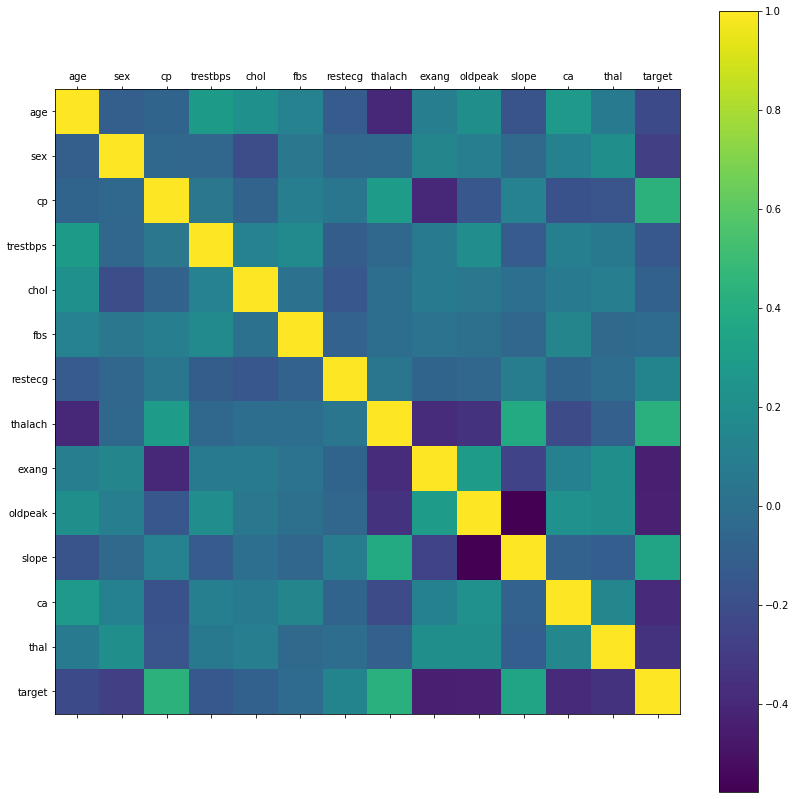

In [12]:
rcParams['figure.figsize']=20,14
plt.matshow(dataset.corr())
plt.xticks(np.arange(dataset.shape[1]),dataset.columns)
plt.yticks(np.arange(dataset.shape[1]),dataset.columns)
plt.colorbar()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

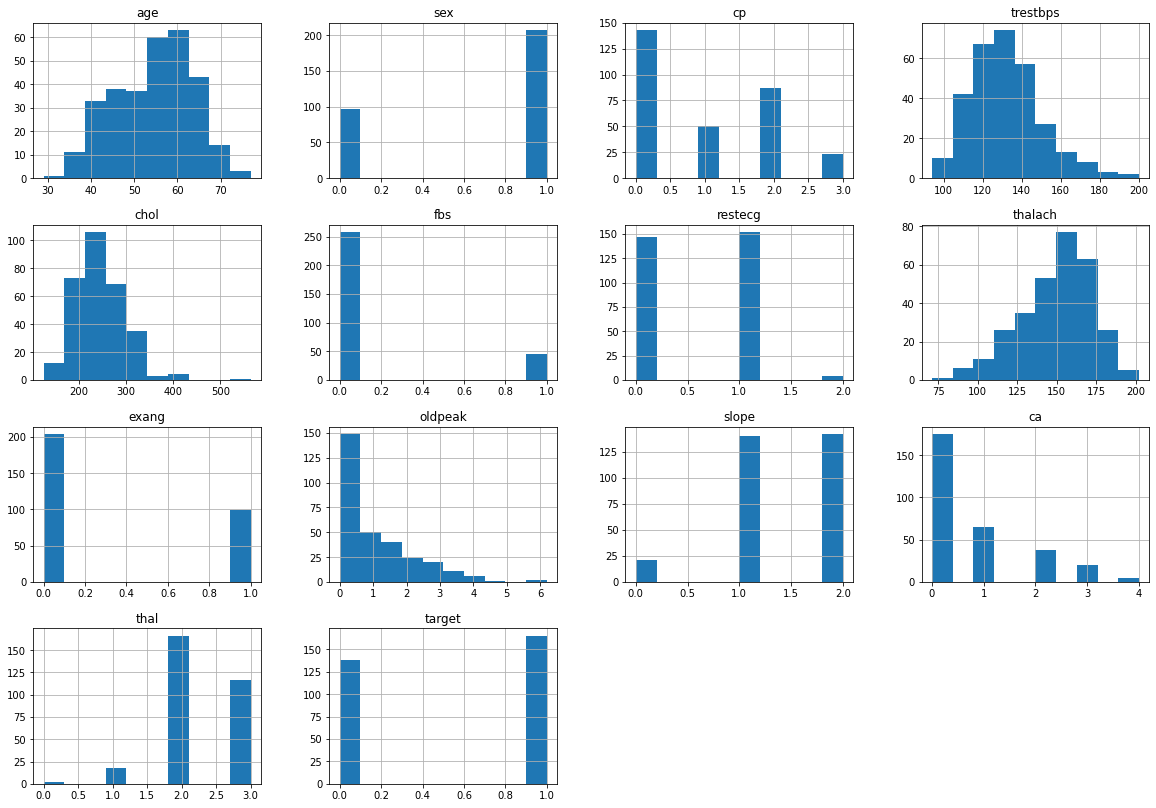

In [13]:
dataset.hist()

Text(0.5, 1.0, 'Count of each Target Class')

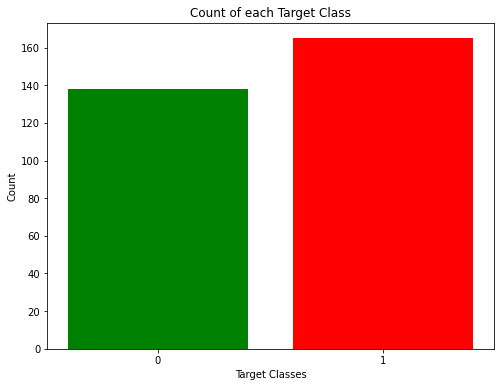

In [14]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['target'].unique(),dataset['target'].value_counts(), color =['red', 'green'])
plt.xticks([0, 1])

plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title("Count of each Target Class")


In [15]:
dataset = pd.get_dummies(dataset, columns = ['sex','cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [16]:
standardScalar= StandardScaler()
columns_to_scale= ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale]= standardScalar.fit_transform(dataset[columns_to_scale])

In [17]:
y = dataset['target']
x = dataset.drop(['target'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3)

In [19]:
# Decision Tree

dt_score=[]
for i in range(1, len(x.columns)+1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(x_train, y_train)
    dt_score.append(dt_classifier.score(x_test, y_test))

Text(0.5, 1.0, 'Decision Tree Classifier')

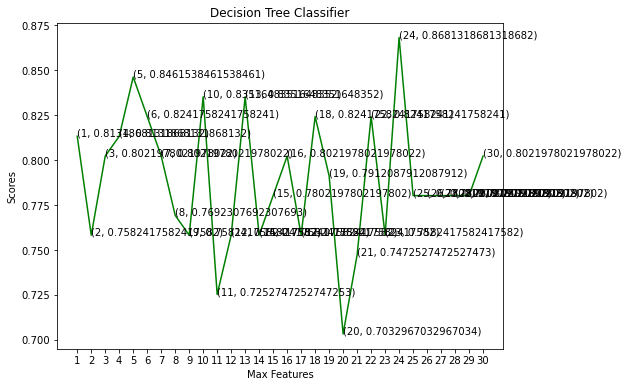

In [22]:
plt.plot([i for i in range(1, len(x.columns)+1)], dt_score, color = 'green')
for i in range(1, len(x.columns)+1):
    plt.text(i, dt_score[i-1], (i, dt_score[i-1]))
plt.xticks([i for i in range(1, len(x.columns)+1)])
plt.xlabel('Max Features')
plt.ylabel('Scores')
plt.title("Decision Tree Classifier")